In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
n=pd.read_csv('Position_Salaries.csv')

In [76]:
print(n.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
n['Position']=le.fit_transform(n['Position'])

In [78]:
print(n)

   Position  Level   Salary
0         0      1    45000
1         4      2    50000
2         8      3    60000
3         5      4    80000
4         3      5   110000
5         7      6   150000
6         6      7   200000
7         9      8   300000
8         1      9   500000
9         2     10  1000000


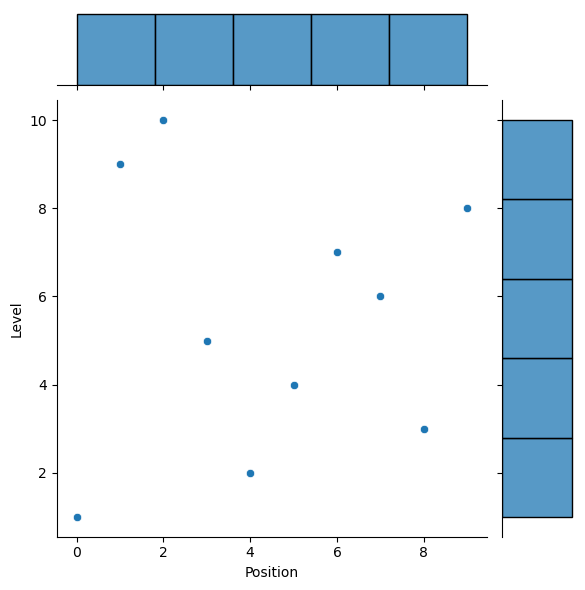

In [79]:
sns.jointplot(x='Position',y='Level',data=n)

C:\Users\kumar\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.11\ipykernel_11376\965773060.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n['Position'],kde=False)


<Axes: xlabel='Position'>

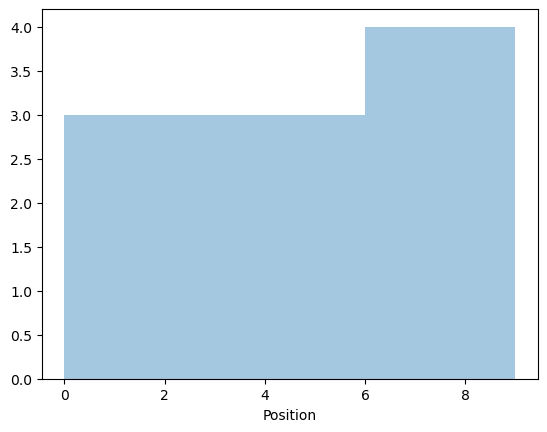

In [80]:
sns.distplot(n['Position'],kde=False)

<Axes: xlabel='Position', ylabel='count'>

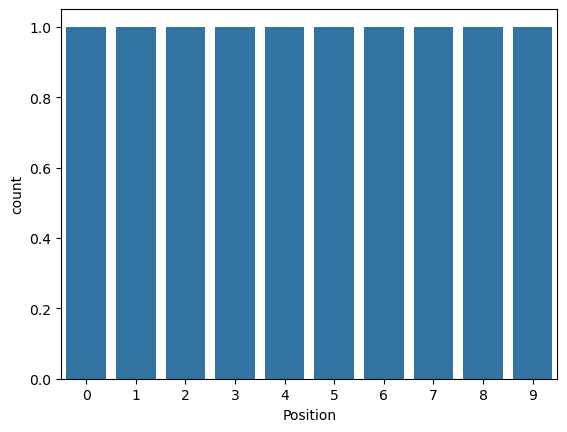

In [81]:
sns.countplot(x='Position',data=n)

In [82]:
x=n.iloc[:,:-1].values
y=n.iloc[:,-1].values

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor  
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [102]:
'''def error(y_true,y_pred):
    mse=mean_square_error(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    cm=confusion_matrix(y_true,y_pred)
    return mse,mae,cm'''

'def error(y_true,y_pred):\n    mse=mean_square_error(y_true,y_pred)\n    mae=mean_absolute_error(y_true,y_pred)\n    cm=confusion_matrix(y_true,y_pred)\n    return mse,mae,cm'

In [104]:
models={
'linear':LinearRegression(),
'svm':SVR(),
'tree':DecisionTreeRegressor(),
'ensemble':RandomForestRegressor(),
'neighbors':KNeighborsRegressor(),
}

In [108]:
results={}
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mae = mean_squared_error(y_test, y_pred)  
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {
        
        'MAE': mae,

        'MSE': mse,

        'R-squared': r2

    }

for model_name, metrics in results.items():

    print(f"{model_name}:")
    
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")

    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")

    print(f"  R-squared: {metrics['R-squared']}")

    print()

linear:
  Mean Absolute Error (MAE): 129249995334.06372
  Mean Squared Error (MSE): 129249995334.06372
  R-squared: 0.4148936381436681

svm:
  Mean Absolute Error (MAE): 380899212673.4112
  Mean Squared Error (MSE): 380899212673.4112
  R-squared: -0.7243060781956143

tree:
  Mean Absolute Error (MAE): 129050000000.0
  Mean Squared Error (MSE): 129050000000.0
  R-squared: 0.41579900407424175

ensemble:
  Mean Absolute Error (MAE): 186639290000.0
  Mean Squared Error (MSE): 186639290000.0
  R-squared: 0.1550960162969669

neighbors:
  Mean Absolute Error (MAE): 318240000000.0
  Mean Squared Error (MSE): 318240000000.0
  R-squared: -0.4406518786781348

